In [60]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
#from matplotlib import artist
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import roc_curve

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

# Chargement des données

In [62]:
requests=pd.read_csv("laulau_data.csv",sep=",",header=0)
requests.index=requests['hotel_id']
requests=requests.drop(['hotel_id'],axis=1)
requests=requests.drop(['Unnamed: 0'],axis=1)
requests=requests.drop(['index'],axis=1)
requests.head()

,group,brand,city,parking,pool,children_policy,price,stock,date,language,mobile,avatar_name
hotel_id,,,,,,,,,,,,
519,Yin Yang,Royal Lotus,copenhagen,0,0,0,208,68,30,french,0,laulau
523,Independant,Independant,copenhagen,0,0,0,85,41,30,french,0,laulau
898,Yin Yang,8 Premium,copenhagen,1,0,0,86,24,30,french,0,laulau
770,Morriott International,Morriot,copenhagen,1,1,0,210,73,30,french,0,laulau
562,Chillton Worldwide,Quadrupletree,copenhagen,0,0,0,215,74,30,french,0,laulau


In [ ]:
requests["group"]=pd.Categorical(requests["group"],ordered=False)
requests["parking"]=pd.Categorical(requests["parking"],ordered=False)
requests["pool"]=pd.Categorical(requests["pool"],ordered=False)
requests["brand"]=pd.Categorical(requests["brand"],ordered=False)
requests["children_policy"]=pd.Categorical(requests["children_policy"],ordered=False)
requests["language"]=pd.Categorical(requests["language"],ordered=False)
requests["mobile"]=pd.Categorical(requests["mobile"],ordered=False)
requests["city"]=pd.Categorical(requests["city"],ordered=False)
requests=requests.drop(['avatar_name'], axis=1)

In [ ]:
#on transforme les catégories de string en catégories de nombres (on pourra faire les correspondances plus tard)
_, opt = np.unique(np.array(requests['group']), return_inverse=True)
requests['group']=opt
_, opt = np.unique(np.array(requests['brand']), return_inverse=True)
requests['brand']=opt
_, opt = np.unique(np.array(requests['city']), return_inverse=True)
requests['city']=opt
_, opt = np.unique(np.array(requests['language']), return_inverse=True)
requests['language']=opt
requests

,group,brand,city,parking,pool,children_policy,price,stock,date,language,mobile
hotel_id,,,,,,,,,,,
519,5,13,0,0,0,0,208,68,30,4,0
523,3,7,0,0,0,0,85,41,30,4,0
898,5,0,0,1,0,0,86,24,30,4,0
770,4,10,0,1,1,0,210,73,30,4,0
562,2,12,0,0,0,0,215,74,30,4,0
...,...,...,...,...,...,...,...,...,...,...,...
498,1,2,3,0,0,0,94,40,30,2,1
516,4,4,3,1,0,2,195,117,30,2,1
187,0,9,3,1,1,0,137,86,30,2,1


# Création de l'échantillon d'apprentissage et de l'échantillon test

In [ ]:
price=requests["price"]
X_train,X_test,price_train,price_test=train_test_split(requests,price,test_size=0.25,random_state=11)
X_train=X_train.drop(['price'], axis=1)
X_test=X_test.drop(['price'], axis=1)
X_train.head()

,group,brand,city,parking,pool,children_policy,stock,date,language,mobile
hotel_id,,,,,,,,,,
237,4,5,2,1,0,0,56,30,2,0
476,3,7,2,1,0,0,33,30,2,0
221,3,7,3,1,0,0,28,30,1,0
618,0,11,1,1,0,0,39,30,0,0
600,3,7,1,1,0,0,27,30,3,0


#### On définit le MAPE

In [ ]:
# On définit la fonction MAPE : Mean Absolute Percentage Error
def MAPE(Y_actual,Y_Predicted):
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
    return mape

# Random Forest

In [ ]:
rf= RandomForestRegressor(n_estimators=400,max_features=2)
rfFit=rf.fit(X_train, price_train)

In [ ]:
# Optimisation des paramètres : Fait planter mon ordinateur 
# param=[{"n_estimators":list(range(50,500,50)),"max_features":list(range(2,10,1)) }]
# n_features = np.shape(X_train)[1]
# rf= GridSearchCV(RandomForestRegressor(),
#         param,cv=10,n_jobs=-1)
# rfOpt=rf.fit(X_train, price_train)

# # paramètre optimal
# print("Meilleur score = %f, Meilleur paramètre = %s" % (1. - rfOpt.best_score_,rfOpt.best_params_))

#### Prédictions

In [ ]:
predictions = rf.predict(X_test)

In [ ]:
print("MSE=",mean_squared_error(price_test,predictions))
print("R2=",r2_score(price_test,predictions))
print("MAPE=", MAPE(price_test,predictions))

MSE= 183.90915287431824
R2= 0.9369475656737846
MAPE= 8.145585084153923


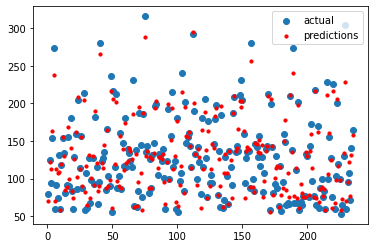

In [ ]:
x = np.linspace(1,np.shape(price_test)[0],np.shape(price_test)[0])
plt.scatter(x,price_test,label='actual')
plt.scatter(x,predictions,s=10,c='red',label='predictions')
plt.legend()

## Interprétabilité

### Features Importance

In [ ]:
# Importance décroissante des variables
feature_importance_df = pd.DataFrame({
    'Feature' : X_train.columns,
    'Importance' : rfFit.feature_importances_
}).sort_values(by='Importance', ascending=False)
feature_importance_df

,Feature,Importance
6,stock,0.419801
1,brand,0.173456
4,pool,0.104870
2,city,0.097910
8,language,0.086065
0,group,0.085117
3,parking,0.012306
5,children_policy,0.011685
9,mobile,0.008790
7,date,0.000000


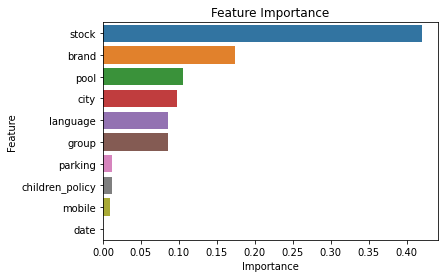

In [ ]:
plt.title('Feature Importance')
sns.barplot(data = feature_importance_df.head(20), x='Importance', y='Feature')

### PDP and ICE plots

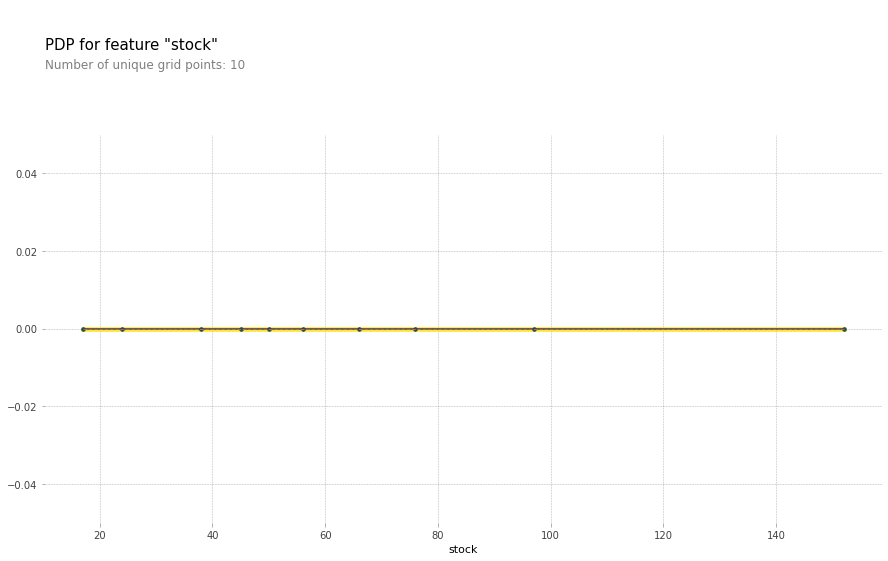

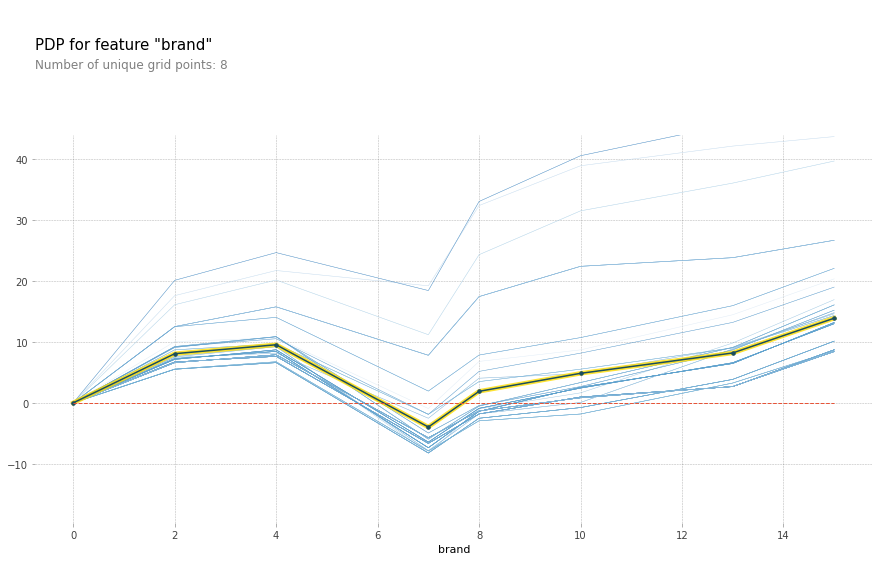

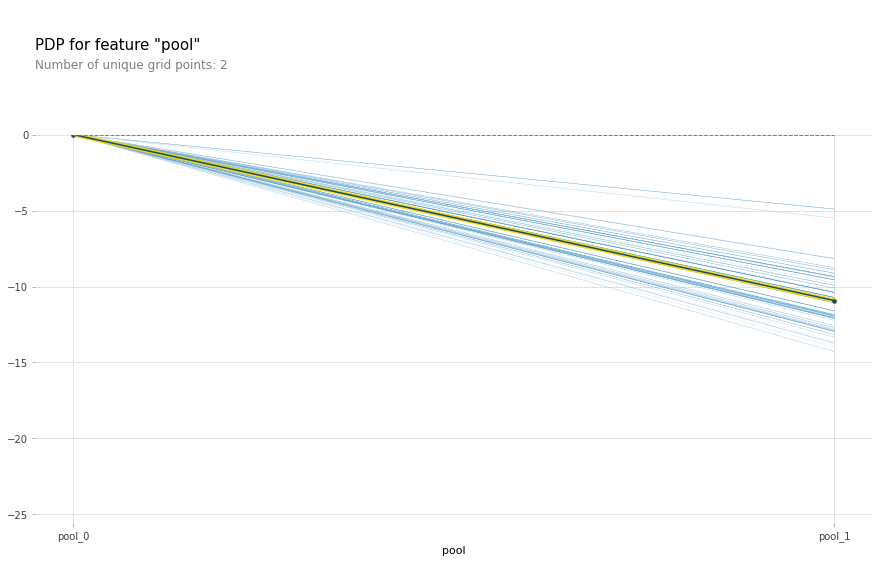

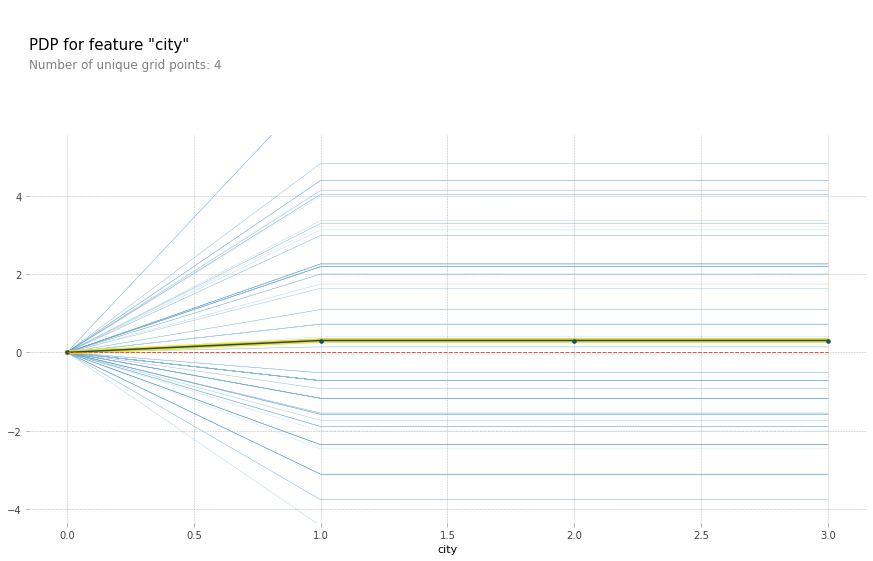

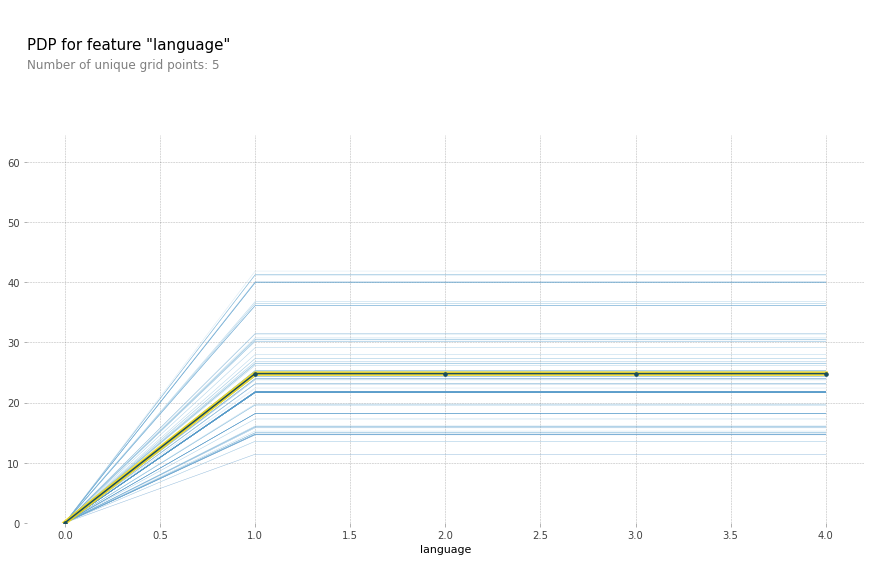

In [ ]:
from pdpbox import pdp, get_dataset, info_plots
model = rf #lr, mlp
model_name = 'random forest'

features_importance_dict = {}
features_importance_dict[model_name] = feature_importance_df #add the dataframe to your dictionnary

top_5_features = features_importance_dict[model_name].Feature[:5].values

for i, feature in enumerate(top_5_features, 1):
  #print(feature)
  pdp_feat = pdp.pdp_isolate(model=model, dataset=X_test, model_features=features_importance_dict[model_name].Feature.values, feature=feature)
  pdp.pdp_plot(pdp_feat, feature, plot_lines=True, frac_to_plot=0.5)
#plt.show()

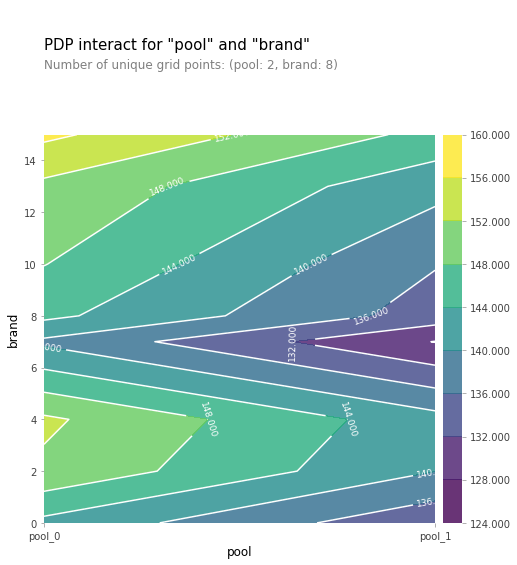

In [ ]:
features_to_plot = ['pool', 'brand']
inter1 = pdp.pdp_interact(model=model, dataset=X_test, model_features=features_importance_dict[model_name].Feature, features=features_to_plot)

pdp.pdp_interact_plot(pdp_interact_out=inter1, feature_names=features_to_plot, plot_type='contour')
plt.show()

### LIME

In [ ]:
import lime
import lime.lime_tabular

index = 0

explainer = lime.lime_tabular.LimeTabularExplainer(X_test.values, feature_names=features_importance_dict[model_name].Feature, mode="regression")
exp = explainer.explain_instance(X_test.iloc[index], rf.predict, num_features=5, top_labels=1)
exp.show_in_notebook(show_table=True, show_all=True)

# Neural Networks

In [ ]:
#on cherche les meilleurs paramètres puis on entraine le modèle avec ces derniers
rate = list(1e-1*np.array(list(range(1,15,3))))
acti = ['relu','tanh','logistic','identity']
#hidden = list(range(10,150,10))
hidden = list(range(10,30,10))
param_grid=[{"hidden_layer_sizes":hidden,"activation":acti,"learning_rate_init":rate}]
nnet= GridSearchCV(MLPRegressor(max_iter=500),param_grid,cv=10,n_jobs=-1)
nnetOpt=nnet.fit(X_train, price_train)
# paramètre optimal
print("Meilleur score = %f, Meilleur paramètre = %s" % (1. - nnetOpt.best_score_,nnetOpt.best_params_))

Meilleur score = 0.235133, Meilleur paramètre = {'activation': 'logistic', 'hidden_layer_sizes': 20, 'learning_rate_init': 0.1}


### Prédiction

In [ ]:
estimated_price_nnet=nnetOpt.predict(X_test)

#### MSE

In [ ]:
mean_squared_error(price_test, estimated_price_nnet)

1963.9003792963167

#### MAPE

In [ ]:
#MAPE(price_test,estimated_price_nnet)

NameError: name 'MAPE' is not defined

## Prédictions sur le test set

In [ ]:
test=pd.read_csv("test_set.csv",sep=",",header=0)
#test.index=test['hotel_id']
#test=test.drop(['hotel_id'],axis=1)
test=test.drop(['order_requests'],axis=1)
bis=test

test=test.drop(['index'],axis=1)
test.head()

,city,date,language,mobile,avatar_id,hotel_id,stock
0,vilnius,21,romanian,0,1,161,46
1,vilnius,21,romanian,0,1,187,32
2,vilnius,21,romanian,0,1,279,12
3,vilnius,21,romanian,0,1,395,10
4,vilnius,21,romanian,0,1,488,42


In [ ]:
features=pd.read_csv("features_hotels.csv",sep=",",header=0)
features_test=features.loc[features["hotel_id"].loc[test['hotel_id']]]
features_test=features_test.reset_index()

In [ ]:
features.head()

,hotel_id,group,brand,city,parking,pool,children_policy
0,0,Yin Yang,Royal Lotus,paris,1,0,1
1,1,Independant,Independant,copenhagen,1,0,0
2,2,Independant,Independant,madrid,0,0,0
3,3,Independant,Independant,rome,1,0,0
4,4,Independant,Independant,sofia,1,0,0


In [ ]:
df=pd.concat([features_test,test[['stock','date','language',"mobile"]]],axis=1)
df.index=df['hotel_id']
df=df.drop(['hotel_id'],axis=1)
df=df.drop(['index'],axis=1)
df.head()

,group,brand,city,parking,pool,children_policy,stock,date,language,mobile
hotel_id,,,,,,,,,,
161,Boss Western,J.Halliday Inn,vilnius,1,0,0,46,21,romanian,0
187,Accar Hotels,Marcure,vilnius,1,1,0,32,21,romanian,0
279,Independant,Independant,vilnius,1,0,0,12,21,romanian,0
395,Accar Hotels,Ibas,vilnius,0,0,0,10,21,romanian,0
488,Accar Hotels,Safitel,vilnius,1,1,1,42,21,romanian,0


In [ ]:
requests=df

In [ ]:
requests["group"]=pd.Categorical(requests["group"],ordered=False)
requests["parking"]=pd.Categorical(requests["parking"],ordered=False)
requests["pool"]=pd.Categorical(requests["pool"],ordered=False)
requests["brand"]=pd.Categorical(requests["brand"],ordered=False)
requests["children_policy"]=pd.Categorical(requests["children_policy"],ordered=False)
requests["language"]=pd.Categorical(requests["language"],ordered=False)
requests["mobile"]=pd.Categorical(requests["mobile"],ordered=False)
requests["city"]=pd.Categorical(requests["city"],ordered=False)

In [ ]:
#on transforme les catégories de string en catégories de nombres (on pourra faire les correspondances plus tard)
_, opt = np.unique(np.array(requests['group']), return_inverse=True)
requests['group']=opt
_, opt = np.unique(np.array(requests['brand']), return_inverse=True)
requests['brand']=opt
_, opt = np.unique(np.array(requests['city']), return_inverse=True)
requests['city']=opt
_, opt = np.unique(np.array(requests['language']), return_inverse=True)
requests['language']=opt
requests

,group,brand,city,parking,pool,children_policy,stock,date,language,mobile
hotel_id,,,,,,,,,,
161,1,8,8,1,0,0,46,21,22,0
187,0,9,8,1,1,0,32,21,22,0
279,3,7,8,1,0,0,12,21,22,0
395,0,6,8,0,0,0,10,21,22,0
488,0,14,8,1,1,1,42,21,22,0
...,...,...,...,...,...,...,...,...,...,...
987,0,6,4,1,0,0,1,5,14,0
26,0,9,7,1,0,0,1,1,14,1
263,1,2,7,1,0,0,0,1,14,1


In [ ]:
predictions = rf.predict(df)

In [ ]:
submission=pd.DataFrame()
submission['index']=bis['index']
submission['price']=predictions
submission=submission.reset_index()
submission=submission.drop(['level_0'],axis=1)

In [ ]:
submission.head()

,index,price
0,0,141.014256
1,1,193.967500
2,2,95.096000
3,3,77.178125
4,4,248.062500


In [ ]:
submission.to_csv('submission.csv', index = False)